___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Science Project 

In this data project we will focus on practice your visualization and pandas skills through exploratory data analysis of stock prices.
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from IEX finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.


In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
* Capital One
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2014 to Jan 1st 2019 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.


In [7]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)

In [37]:
# Bank of America
data.DataReader
BAC = data.DataReader("BAC", 'iex', start, end)

# CitiGroup
C = data.DataReader("C", 'iex', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'iex', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'iex', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'iex', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'iex', start, end)

CCBG = data.DataReader("CCBG", 'iex', start, end)

In [38]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC', "CCBG"],'iex', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [39]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC', "CCBG"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [40]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC, CCBG],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [41]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [42]:
bank_stocks.head()

Bank Ticker      BAC                                             C           \
Stock Info      open     high      low    close    volume     open     high   
date                                                                          
2014-05-19   13.4050  13.6606  13.3632  13.6327  51034696  43.3158  43.9641   
2014-05-20   13.6141  13.6513  13.4561  13.5026  60108208  43.8044  44.1145   
2014-05-21   13.5584  13.6699  13.4747  13.5770  64808554  44.0017  44.2460   
2014-05-22   13.5491  13.6792  13.5212  13.6699  51929418  43.9547  44.3024   
2014-05-23   13.6699  13.7670  13.6141  13.6792  51648948  44.3775  44.5373   

Bank Ticker                              ...        WFC                    \
Stock Info       low    close    volume  ...       open     high      low   
date                                     ...                                
2014-05-19   43.2970  43.9453  13631001  ...    42.1517  42.7558  42.1344   
2014-05-20   43.5789  43.7386  11792403  ...    42.6005  42.6868  42.1776   
2014-05-21   43.8702  44.0205  12823793  ...    42.4451  42.9888  42.4278   
2014-05-22   43.9453  44.2930  12713467  ...    42.8766  43.1873  42.8076   
2014-05-23   44.2460  44.4339   9572844  ...    43.0751  43.3513  42.9543   

Bank Ticker                        CCBG                                    
Stock Info     close    volume     open     high      low    close volume  
date                                                                       
2014-05-19   42.7127  10533825  12.3547  12.5443  12.3168  12.4590   8336  
2014-05-20   42.2552  15095382  12.3832  12.3832  11.9470  12.1556  33959  
2014-05-21   42.8680  12934284  12.1840  12.4400  12.0513  12.2789  16687  
2014-05-22   43.1442  12160307  12.3452  12.6107  12.2599  12.3452  13994  
2014-05-23   43.2909  13167150  12.2978  12.5538  12.2978  12.4874  12212  

[5 rows x 35 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [43]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC      32.2037
C        77.2998
GS      269.3347
JPM     115.9686
MS       57.1168
WFC      62.8752
CCBG     26.7927
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [44]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [45]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return,CCBG Return
date,,,,,,,
2014-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-20,-0.009543,-0.004704,-0.008372,-0.002043,-0.014920,-0.010711,-0.024352
2014-05-21,0.005510,0.006445,0.019188,0.007447,0.010098,0.014502,0.010143
2014-05-22,0.006842,0.006190,0.003138,0.007945,0.012660,0.006443,0.005400
2014-05-23,0.000680,0.003181,0.001939,-0.000368,0.003292,0.003400,0.011519


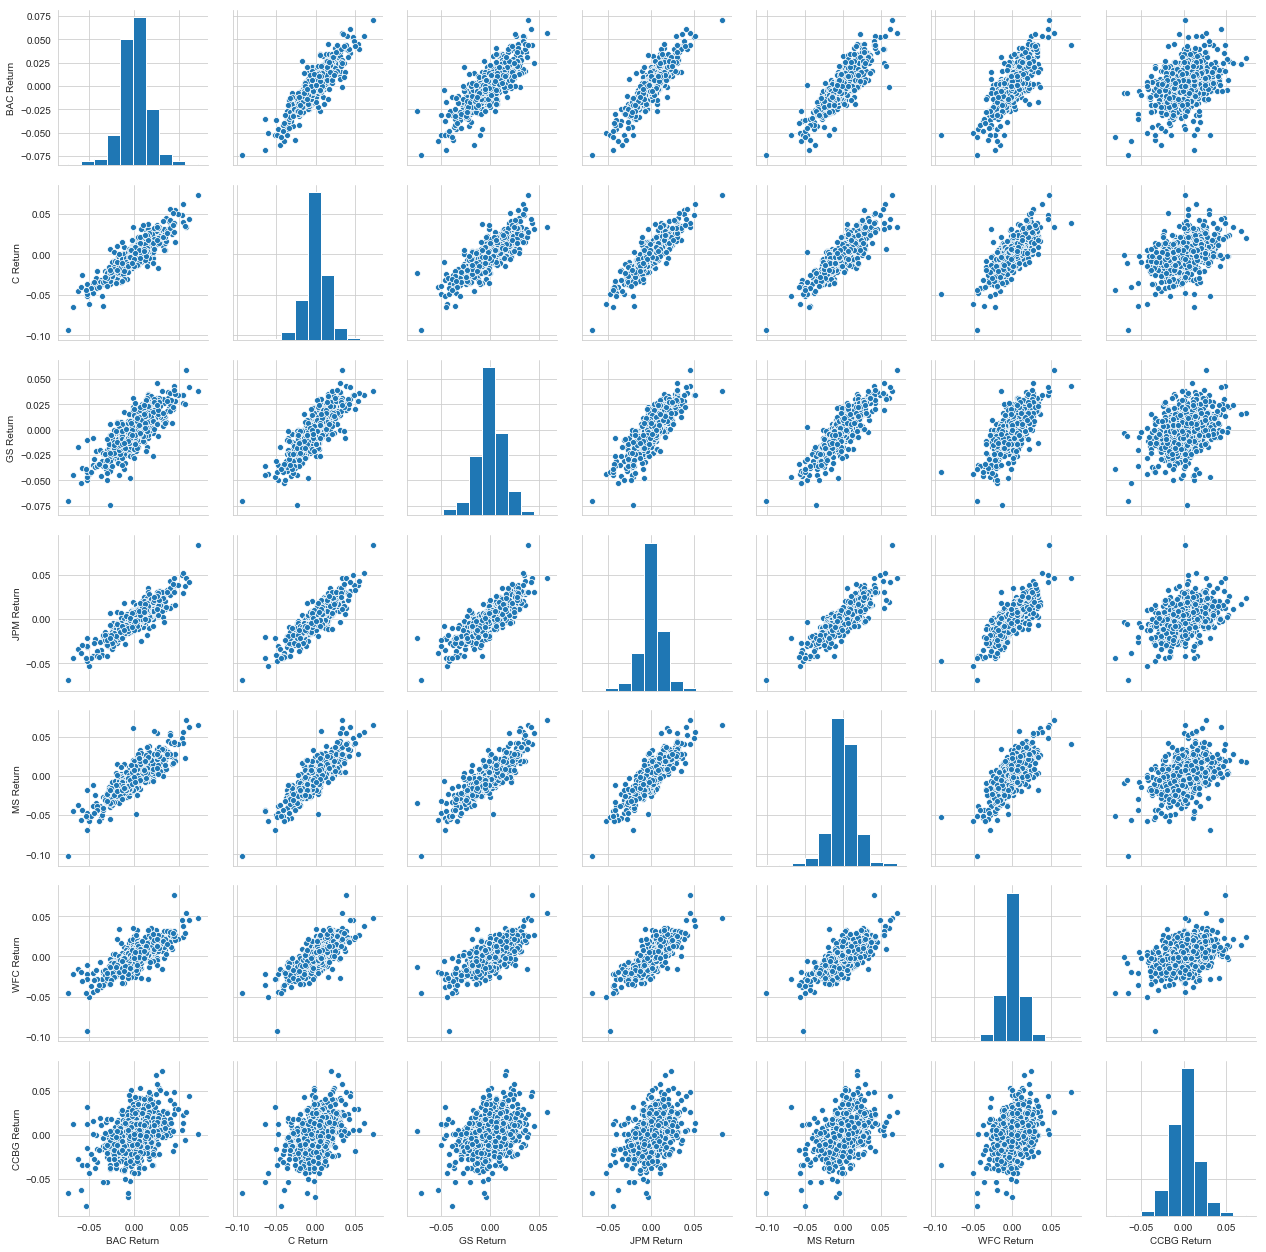

In [46]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Worse Drop days for each bank

In [47]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return     2016-06-24
C Return       2016-06-24
GS Return      2018-11-12
JPM Return     2016-06-24
MS Return      2016-06-24
WFC Return     2018-02-05
CCBG Return    2018-12-04
dtype: object

In [49]:
# Best Single Day Gain
returns.idxmax()

BAC Return     2016-02-12
C Return       2016-02-12
GS Return      2016-11-09
JPM Return     2016-02-12
MS Return      2016-11-09
WFC Return     2016-11-10
CCBG Return    2017-06-09
dtype: object

In [50]:
returns.std() 

BAC Return     0.016067
C Return       0.015199
GS Return      0.014497
JPM Return     0.013207
MS Return      0.016433
WFC Return     0.012971
CCBG Return    0.016573
dtype: float64

In [52]:
returns.ix['2015-01-01':'2015-12-31'].std() # Very similar risk profiles

/Users/mohamedshaaban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Return     0.016174
C Return       0.015288
GS Return      0.014043
JPM Return     0.014006
MS Return      0.016287
WFC Return     0.012552
CCBG Return    0.013525
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Capital one **

/Users/mohamedshaaban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


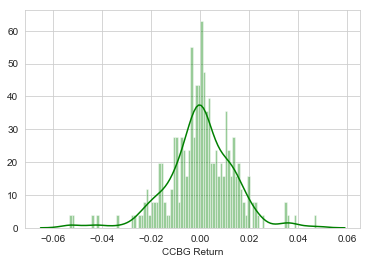

In [54]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['CCBG Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/Users/mohamedshaaban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/mohamedshaaban/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


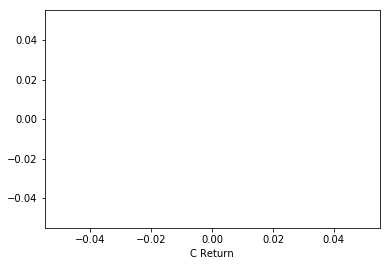

In [25]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [64]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# # Optional Plotly Method Imports
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install cufflinks
import plotly
import cufflinks as cf
cf.go_offline()


    100% |████████████████████████████████| 41.2MB 509kB/s ta 0:00:011
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /Users/mohamedshaaban/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
  Using cached https://files.pythonhosted.org/packages/dd/c9/c6f3675387438929af73e1199c45a623205898bafeab5ccd713efe3b43c2/cufflinks-0.15.tar.gz
  Running setup.py bdist_wheel for cufflinks ... done
  Stored in directory: /Users/mohamedshaaban/Library/Caches/pip/wheels/c7/7f/d3/7d3146a1551614bf0b8eb631ac724d044dd341679e763b594b
Successfully built cufflinks


** Create a line plot showing Close price for each bank for the entire index of time. 

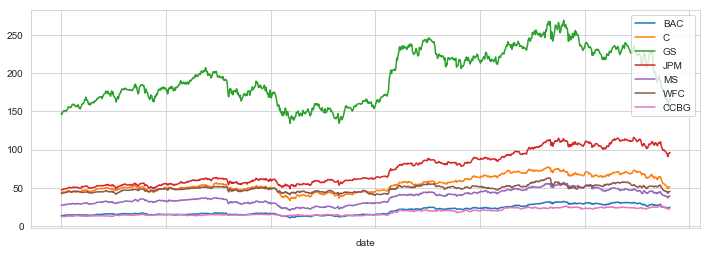

In [55]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,4),label=tick)
plt.legend()

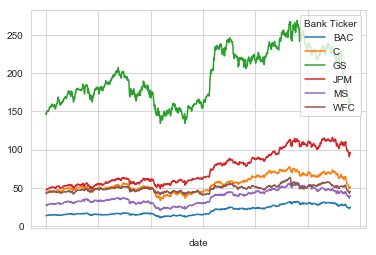

In [32]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').plot()

In [65]:
# plotly
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

/Users/mohamedshaaban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/Users/mohamedshaaban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



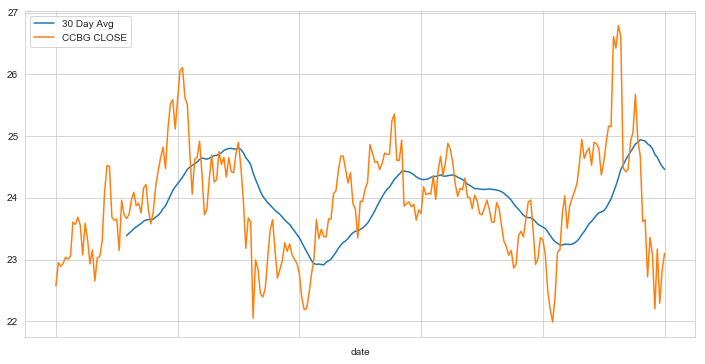

In [66]:
plt.figure(figsize=(12,6))
CCBG['close'].ix['2018-01-01':'2019-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
CCBG['close'].ix['2018-01-01':'2019-01-01'].plot(label='CCBG CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

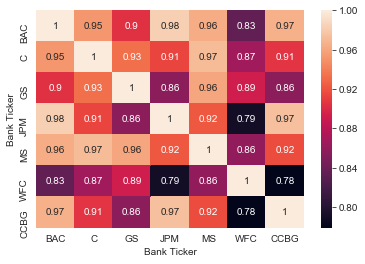

In [57]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

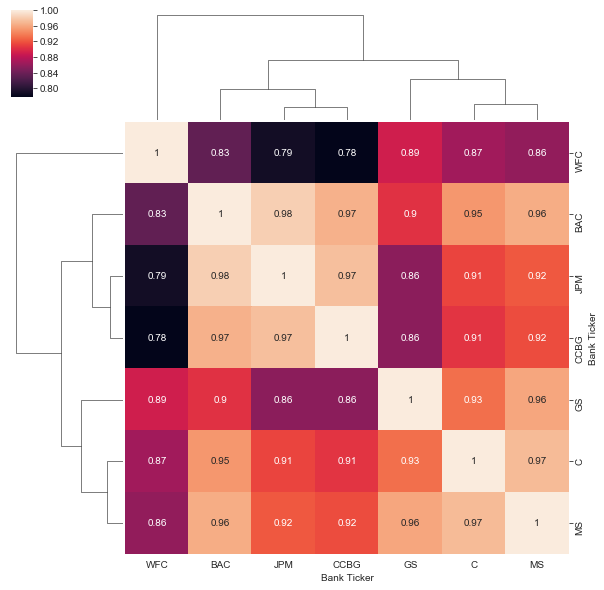

In [58]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

In [67]:
close_corr = bank_stocks.xs(key='close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [68]:
CCBG[['open', 'high', 'low', 'close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')

/Users/mohamedshaaban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [69]:
MS['close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

/Users/mohamedshaaban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [70]:
CCBG['close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

/Users/mohamedshaaban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.